In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
plot_data <- read.csv("drug_perturbation_survival_data.csv")

In [3]:
plot_data <- plot_data %>%
  filter(supplements != "aCD3/aCD28") %>%
  mutate(perc_survival = as.numeric(perc_survival))

In [4]:
plot_data <- plot_data %>%
  mutate(supplements = ifelse(supplements == "none", "-", "+"))

In [5]:
plot_data <- plot_data %>%
  mutate(group = paste0(drug, "_",dose_nM)) %>%
  mutate(lt = ifelse(supplements == "+", "solid", "dashed")) %>%
  mutate(drug_label = case_when(
      drug == "Bortezomib" ~ paste0("Bortezomib\n", dose_nM, "nM"),
      drug == "Lenalidomide" ~ paste0("Lenalidomide\n", dose_nM, "nM"),
      drug == "Dexamethasone" ~ paste0("Dexamethasone\n", dose_nM, "nM"),
      TRUE ~ "DMSO Only"
  ))

In [6]:
plot_data <- plot_data %>%
  mutate(drug_label = factor(
      drug_label,
      levels = c('Bortezomib\n1nM','Bortezomib\n2.5nM','Bortezomib\n5nM',
                 'Lenalidomide\n500nM','Lenalidomide\n1000nM','Lenalidomide\n1500nM',
                 'Dexamethasone\n25nM','Dexamethasone\n50nM','Dexamethasone\n100nM',
                 'DMSO Only')
  ))

In [7]:
head(plot_data)

,drug,dose_nM,supplements,time_hr,n_live_cells,perc_survival,group,lt,drug_label
,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<fct>
1,Bortezomib,1.0,-,24,59018,81.4,Bortezomib_1,dashed,Bortezomib 1nM
2,Bortezomib,2.5,-,24,58396,80.8,Bortezomib_2.5,dashed,Bortezomib 2.5nM
3,Bortezomib,5.0,-,24,56995,79.2,Bortezomib_5,dashed,Bortezomib 5nM
4,Bortezomib,1.0,-,48,74105,86.2,Bortezomib_1,dashed,Bortezomib 1nM
5,Bortezomib,2.5,-,48,66587,79.7,Bortezomib_2.5,dashed,Bortezomib 2.5nM
6,Bortezomib,5.0,-,48,61608,74.8,Bortezomib_5,dashed,Bortezomib 5nM


In [8]:
control_data <- plot_data %>%
  filter(drug == "DMSO" & supplements == "-") %>%
  select(-drug_label)

In [9]:
control_data

drug,dose_nM,supplements,time_hr,n_live_cells,perc_survival,group,lt
<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
DMSO,0,-,0,-,91.2,DMSO_0,dashed
DMSO,0,-,24,58982,81.6,DMSO_0,dashed
DMSO,0,-,48,57819,84.9,DMSO_0,dashed
DMSO,0,-,72,53239,83.6,DMSO_0,dashed


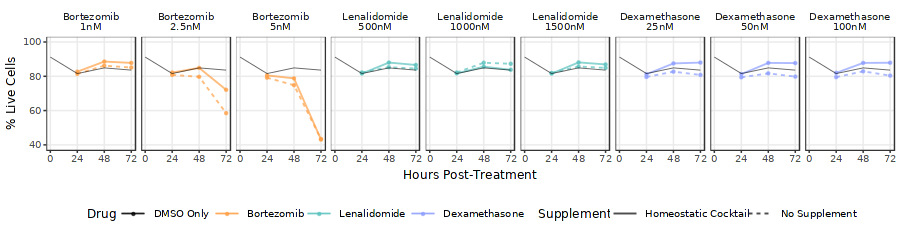

In [10]:
options(repr.plot.width = 7.5, repr.plot.height = 2)
p <- ggplot() +
  geom_line(data = plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_survival,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.4,
            alpha = 0.7) +
  geom_point(data = plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_survival,
               group = supplements,
               color = drug),
            alpha = 0.7,
            size = 0.2) +
  geom_line(data = control_data,
           aes(x = time_hr,
               y = perc_survival,
               group = supplements,
               color = drug),
            linewidth = 0.2,
            alpha = 0.6) +
  facet_wrap(~ drug_label, nrow = 1) +
  scale_color_manual("Drug",
                     breaks = c("DMSO", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     labels = c("DMSO Only", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     values = c("black", "#FF9F45", "#59C1BD", "#8D9EFF")) +
  scale_linetype_manual("Supplement",
                        breaks = c("+", "-"),
                        labels = c("Homeostatic Cocktail",
                                   "No Supplement"),
                        values = c("solid", "dashed")) +
  scale_y_continuous("% Live Cells",
                     limits = c(40, 100)) +
  scale_x_continuous("Hours Post-Treatment",
                     breaks = seq(0, 72, 24)) +
  theme_bw(base_size = 7) +
  theme(legend.position = "bottom",
        panel.grid.minor = element_blank(),
        strip.background = element_blank())
p

In [11]:
ggsave(
    "Figure_survival_line_plots.pdf",
    p,
    width = 7.5, height = 2
)